# Load Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import randint, uniform

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Model Tuning
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

import xgboost as xgb
import lightgbm as lgb


from sklearn.ensemble import BaggingClassifier, BaggingRegressor

from sklearn import set_config
# set_config(display='diagram')

import os
import psutil


import warnings
# warnings.filterwarnings('ignore')

# Ignore the warning
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

# Load Data

> Data Readme
https://

## Load RAW data

In [119]:
# set data source
data_url = 'data/train.csv'

# set index column
index_col = 'id'

# load data
data = pd.read_csv(data_url, index_col=index_col)
data.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


## Missing Values

In [ ]:
#filter all the features with missing values
feature_null= X.isnull().mean().sort_values(ascending = False)
feature_null=feature_null[feature_null>0]

feature_with_missing_values = feature_null.index.sort_values().to_list()
print(f'feature with missing values (\033[95m{len(feature_with_missing_values)}\
\033[0m): \033[94m{feature_with_missing_values}\033[0m')
# visualize
plt.figure(figsize=(12, 4))
feature_ranks = range(len(feature_null))
bar = plt.barh(feature_null.index, feature_null.values, label=[str(x) for x in feature_ranks])
plt.gca().invert_yaxis()
plt.xlabel('%')
plt.title("Percentage (%) of missing values")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

## Feature Engineering & Selection

In [209]:
# select a subset of data for large dataset
n_samples=45000
data_eng = data.copy()#.sample(n_samples, random_state=42)


# data_eng['Length_Height'] = data_eng['Length']/data_eng['Height']
# data_eng['Viscera_Weight_Ratio'] = data_eng['Viscera Weight']/data_eng['Weight']
# data_eng['Log Volume'] = np.log(data_eng['Volume'])

# define the target column in the train dataset
# split columns into X and y
target = 'Age'
data_eng['Log Weight'] = np.log(data_eng['Weight'])
data_eng['Volume'] = data_eng['Length']*data_eng['Diameter']*data_eng['Height']
data_eng['Log Volume'] = np.log(data_eng['Length']*data_eng['Diameter']*data_eng['Height'])
data_eng['Density'] = data_eng['Weight']/(data_eng['Height']*data_eng['Length']*data_eng['Diameter'])
data_eng['Diameter_Height_Ratio'] = data_eng['Diameter']/data_eng['Height']
data_eng['Shell_Weight_Ratio'] = data_eng['Shell Weight']/data_eng['Weight']
data_eng['Shape'] = data_eng['Length']*data_eng['Height']/(data_eng['Diameter']**2)

data_eng = data_eng[data_eng.Height>0][data_eng.Diameter_Height_Ratio<7.5]#[data_eng.Sex=='F']

X = data_eng.drop(columns=target).copy()
y = data_eng[target]
# check the shape of the data
print(f'shape of X is \033[94m{X.shape}\033[0m, hape of y is \033[94m{y.shape}\033[0m')
display(X.describe().T)

# features_to_drop = ['Diameter', 'Height', 'Shucked Weight', 'Viscera Weight','Length', 'Shell Weight', ]

features_to_drop=[]

X = X.drop(columns=features_to_drop)
display(X.describe().T)

shape of X is (74014, 15), hape of y is (74014,)


,count,mean,std,min,25%,50%,75%,max
Length,74014.0,1.317759,0.287397,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74014.0,1.024741,0.237112,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74014.0,0.348258,0.091749,0.025000,0.300000,0.362500,0.412500,2.825000
Weight,74014.0,23.393817,12.643249,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74014.0,10.107991,5.615972,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74014.0,5.060183,2.791658,0.042524,2.877474,4.989512,7.002326,21.545620
Shell Weight,74014.0,6.726378,3.582962,0.042524,3.968930,6.945627,9.071840,28.491248
Log Weight,74014.0,2.924723,0.803659,-2.869999,2.598061,3.169661,3.470801,4.383295
Volume,74014.0,0.540454,0.300555,0.000645,0.303555,0.544430,0.755305,3.321141
Log Volume,74014.0,-0.860861,0.842555,-7.346987,-1.192194,-0.608016,-0.280634,1.200308


,count,mean,std,min,25%,50%,75%,max
Length,74014.0,1.317759,0.287397,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74014.0,1.024741,0.237112,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74014.0,0.348258,0.091749,0.025000,0.300000,0.362500,0.412500,2.825000
Weight,74014.0,23.393817,12.643249,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74014.0,10.107991,5.615972,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74014.0,5.060183,2.791658,0.042524,2.877474,4.989512,7.002326,21.545620
Shell Weight,74014.0,6.726378,3.582962,0.042524,3.968930,6.945627,9.071840,28.491248
Log Weight,74014.0,2.924723,0.803659,-2.869999,2.598061,3.169661,3.470801,4.383295
Volume,74014.0,0.540454,0.300555,0.000645,0.303555,0.544430,0.755305,3.321141
Log Volume,74014.0,-0.860861,0.842555,-7.346987,-1.192194,-0.608016,-0.280634,1.200308


## Feature Screening & Selection

In [210]:
features_all = X.columns.sort_values().to_list()

feature_numerical = X.select_dtypes(exclude='object').columns.to_list()

feature_categorical = X.select_dtypes(include='object').columns.to_list()

feature_categorical_Ordinal = []

feature_categorical_OneHot = [key for key in feature_categorical 
                              if key not in feature_categorical_Ordinal]

print(f'All features (\033[95m{len(features_all)}\
\033[0m): \033[94m{features_all}\033[0m')

print(f'Features to drop (\033[91m{len(features_to_drop)}\
\033[0m): \033[94m{features_to_drop}\033[0m')

print(f'Categorical cat features (\033[95m{len(feature_categorical)}\
\033[0m): \033[94m{feature_categorical}\033[0m')

print(f'Ordinal cat features (\033[95m{len(feature_categorical_Ordinal)}\
\033[0m): \033[94m{feature_categorical_Ordinal}\033[0m')

print(f'None-ordinal cat features (\033[95m{len(feature_categorical_OneHot)}\
\033[0m): \033[94m{feature_categorical_OneHot}\033[0m')

print(f'Numercial features (\033[95m{len(feature_numerical)}\
\033[0m): \033[94m{feature_numerical}\033[0m')

All features (15): ['Density', 'Diameter', 'Diameter_Height_Ratio', 'Height', 'Length', 'Log Volume', 'Log Weight', 'Sex', 'Shape', 'Shell Weight', 'Shell_Weight_Ratio', 'Shucked Weight', 'Viscera Weight', 'Volume', 'Weight']
Features to drop (0): []
Categorical cat features (1): ['Sex']
Ordinal cat features (0): []
None-ordinal cat features (1): ['Sex']
Numercial features (14): ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Log Weight', 'Volume', 'Log Volume', 'Density', 'Diameter_Height_Ratio', 'Shell_Weight_Ratio', 'Shape']


# Data Exploration

## Numerical Features

### Overview

Numercial features (8): ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Diameter_Height_Ratio']


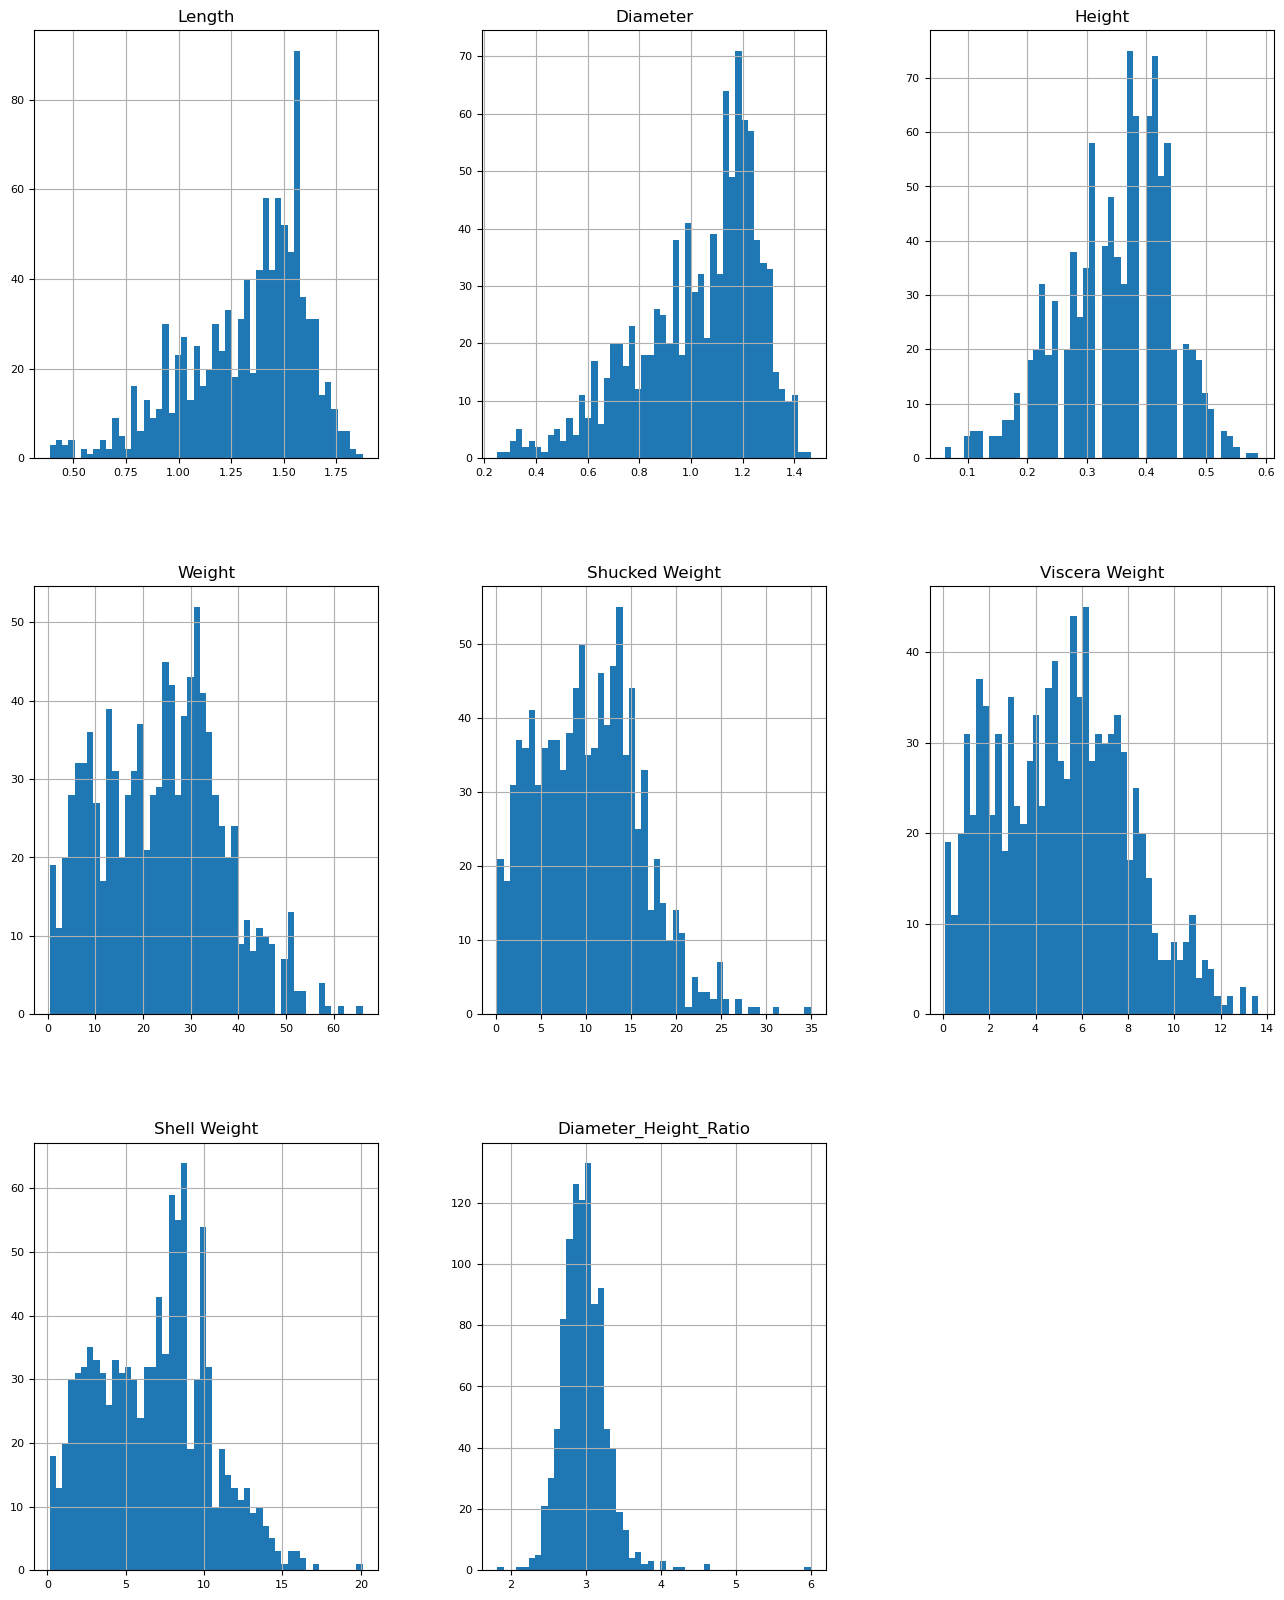

In [5]:
print(f'Numercial features (\033[95m{len(feature_numerical)}\
\033[0m): \033[94m{feature_numerical}\033[0m')

X[feature_numerical].hist(
    figsize=(16, 20), 
    bins=50, 
    xlabelsize=8, 
    ylabelsize=8);

### Corrilations

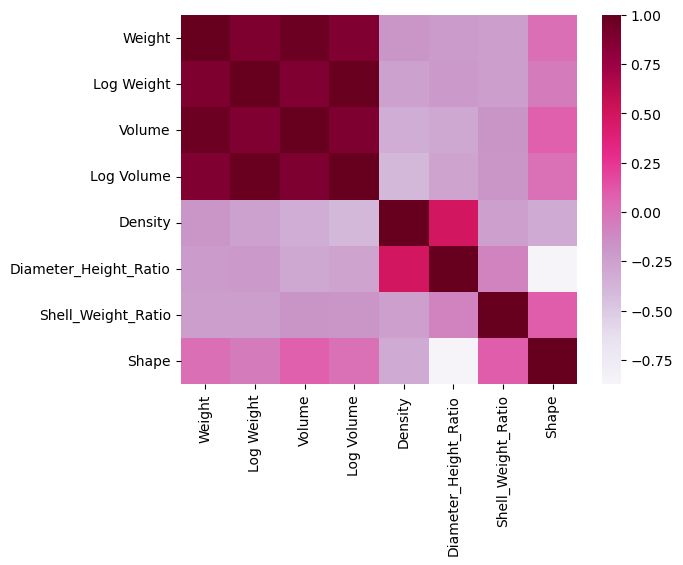

In [195]:
X_num = X[feature_numerical].dropna()

sns.heatmap(X_num.corr(), cmap='PuRd')
pca = PCA()
X_scaled = StandardScaler().fit_transform(X_num)
X_pca = pca.fit_transform(X_scaled)

### Principal components Analysis

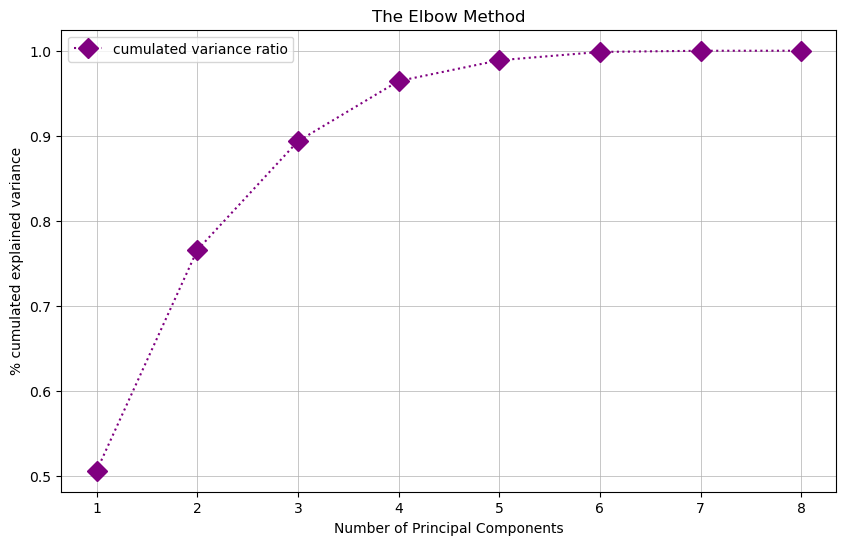

In [196]:
with plt.style.context('seaborn-deep'):
    
    # figsize
    plt.figure(figsize=(10,6))
    
    # getting axes
    ax = plt.gca()
    
    # plotting
    evr_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,evr_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,evr_cumulated,label="cumulated variance ratio",
            color="purple",linestyle=":",marker="D",markersize=10)
    
    
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

## Catigorical Features

### Overview

In [ ]:
plot_list=feature_categorical

print(f'Categorical cat features (\033[95m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

num_cols = 2  # Number of columns in the grid

num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))

# Plot each categorical feature
for i, feature in enumerate(plot_list):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    sns.histplot(data=X, x=feature, kde=False, ax=ax)

# Hide unused subplots
if len(plot_list) < num_rows * num_cols:
    for j in range(len(plot_list), num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

### Catigorical Ordinal Features

In [ ]:
plot_list = feature_categorical_Ordinal

print(f'Categorical cat features (\033[94m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

if len(plot_list)>0:
    # Assuming 'X' is your DataFrame
    num_cols = 4  # Number of columns in the grid
    num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))

    # Plot each categorical feature
    for i, feature in enumerate(plot_list):
        ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
        sns.histplot(data=X, x=feature, kde=False, ax=ax)

    # Hide unused subplots
    if len(plot_list) < num_rows * num_cols:
        for j in range(len(plot_list), num_rows * num_cols):
            axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_list=feature_categorical_OneHot

print(f'Categorical cat features (\033[94m{len(plot_list)}\
\033[0m): \033[94m{plot_list}\033[0m')

if len(plot_list)>0:
    # Assuming 'X' is your DataFrame
    num_cols = 4  # Number of columns in the grid
    num_rows = (len(plot_list) - 1) // num_cols + 1  # Number of rows in the grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 2*num_rows))

    # Plot each categorical feature
    for i, feature in enumerate(plot_list):
        ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
        sns.histplot(data=X, x=feature, kde=False, ax=ax)

    # Hide unused subplots
    if len(plot_list) < num_rows * num_cols:
        for j in range(len(plot_list), num_rows * num_cols):
            axes[j // num_cols, j % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

### Catigorical Ordinal Features Mapping

In [ ]:
# feat_ordinal_dict = {
#     # considers "missing" as the worse category
#     "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
# #     "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
# #     "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
# #     "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
# #     "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
#     "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
# #     "Fence": ['missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
#     "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
# #     "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
# #     "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
# #     "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
# #     "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex']
# #     "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
# #     "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
# #     "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
# #     "PavedDrive": ['missing', 'N', 'P', 'Y'],
# #     "PoolQC": ['missing', 'Fa', 'Gd', 'Ex'],
# }


# ordinal_features = list(feat_ordinal_dict.keys())
# ordinal_values = list(feat_ordinal_dict.values())

### Catigorical OneHot Features

In [ ]:
# list the number of categories of each OneHot feature
feature_cat_value_count= X[feature_categorical_OneHot].nunique().sort_values(ascending=False)
feature_cat_value_count=feature_cat_value_count[feature_cat_value_count>0]

# visualize
plt.figure(figsize=(8, feature_cat_value_count.shape[0]/4))
feature_ranks = range(len(feature_null))
bar = plt.barh(feature_cat_value_count.index, feature_cat_value_count.values, label=[str(x) for x in feature_ranks])
plt.gca().invert_yaxis()
plt.xlabel('%')
plt.title("Number of unique categories")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

# Data Preprocessing

## A custom pipeline for Feature Engineering

In [ ]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):
        
        self.add_attributes = add_attributes
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        
        if self.add_attributes:
            X_copy = X.copy()
            
            X_copy['Diameter_Height_Ratio'] = X_copy['Diameter']/X_copy['Height']
#             X_copy ["Volume"] = X_copy["Height"] * X_copy["Diameter"] * X_copy["Length"]
#             X_copy ["dim1"] = X_copy["Height"] * X_copy["Diameter"] 
#             X_copy ["dim2"] = X_copy["Height"] * X_copy["Length"] 
#             X_copy ["dim3"] = X_copy["Diameter"] * X_copy["Length"]
#             X_copy ["total_weight"] = X_copy["Shell Weight"] + X_copy["Viscera Weight"] + X_copy["Shucked Weight"]
#             X_copy ["weight_volume_ratio"] = X_copy["Weight"] / (X_copy["Diameter"] + 1e-8 )
#             X_copy ["shell_to_total_weight"] = X_copy["Shell Weight"] / X_copy["Weight"]
#             X_copy ["viscera_to_total_weight"] = X_copy["Viscera Weight"] / X_copy["Weight"]
#             X_copy ["shucked_to_total_weight"] = X_copy["Shucked Weight"] / X_copy["Weight"]
            
            return X_copy
        else:
            return X_copy

Creator = FeatureCreator(add_attributes = True)

## Preprocessing Pipeline

In [211]:
#transformer for numerical data
preproc_num = make_pipeline(
#     StandardScaler(),
#     PCA(3)
    RobustScaler()
)

preproc_cat_onehot = make_pipeline(
    OneHotEncoder(
        drop = 'if_binary',
        sparse_output=False,
        handle_unknown='ignore')
)

preproc_pipeline = make_column_transformer(
    (preproc_num, feature_numerical),
    (preproc_cat_onehot, feature_categorical_OneHot),
)

X_preprocessed = preproc_pipeline.fit_transform(X)

display(preproc_pipeline)
pd.DataFrame(X_preprocessed, columns=preproc_pipeline.get_feature_names_out()).describe().T

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['Length', 'Diameter', 'Height', 'Weight',
                                  'Shucked Weight', 'Viscera Weight',
                                  'Shell Weight', 'Log Weight', 'Volume',
                                  'Log Volume', 'Density',
                                  'Diameter_Height_Ratio', 'Shell_Weight_Ratio',
                                  'Shape']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

,count,mean,std,min,25%,50%,75%,max
pipeline-1__Length,74014.0,-0.147718,0.741670,-3.064516,-0.580645,0.000000e+00,0.419355,1.645973
pipeline-1__Diameter,74014.0,-0.160828,0.758758,-3.000000,-0.600000,0.000000e+00,0.400000,1.720000
pipeline-1__Height,74014.0,-0.126599,0.815542,-3.000000,-0.555556,0.000000e+00,0.444444,21.888889
pipeline-1__Weight,74014.0,-0.021660,0.675212,-1.267979,-0.553369,0.000000e+00,0.446631,3.006813
pipeline-1__Shucked Weight,74014.0,0.024018,0.674950,-1.187394,-0.504259,0.000000e+00,0.495741,3.879046
pipeline-1__Viscera Weight,74014.0,0.017133,0.676790,-1.199313,-0.512027,0.000000e+00,0.487973,4.013746
pipeline-1__Shell Weight,74014.0,-0.042965,0.702141,-1.352778,-0.583333,0.000000e+00,0.416667,4.222222
pipeline-1__Log Weight,74014.0,-0.280653,0.920845,-6.920342,-0.654948,0.000000e+00,0.345052,1.390602
pipeline-1__Volume,74014.0,-0.008801,0.665312,-1.203730,-0.533204,0.000000e+00,0.466796,6.146565
pipeline-1__Log Volume,74014.0,-0.277376,0.924300,-7.392793,-0.640855,0.000000e+00,0.359145,1.983770


# Model

## Custom Loss Function

In [20]:
# EXAMPLE:
def my_mae_round(y_true, y_pred):
    return np.mean(np.abs(y_true-np.round(y_pred,0)))

from sklearn.metrics import make_scorer
            
mae_round = make_scorer(my_mae_round)

## Cross Validation

In [212]:
# this code is to use cross validation to screen 
# all available models with default hyperparameters
# please comment out the models which are not relevant

models = {
    'SVM_Reg_rbf': SVR(kernel='rbf'),
    'lightGBM Regressor': lgb.LGBMRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
#     'Ridge': Ridge(),
#     'SVM_linear': SVR(kernel='linear'),
#     'Linear Regression': LinearRegression(),
#     'RandomForestRegressor': RandomForestRegressor(),
#     'SVM_poly': SVR(kernel='poly'),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'KNN Regressor': KNeighborsRegressor(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'SVC': SVC(),
#     'KNN Classifier': KNeighborsClassifier(),
#     'Decision Tree Classifier': DecisionTreeClassifier(),
#     'LGBM Clas sifier': lgb.LGBMClassifier(),
#     'XGBClassifier': xgb.XGBClassifier(),
#     'Decision Tree': DecisionTreeRegressor(),
}

print('Baseline Score(s) of each model are ....')

for model in models:
    cv_result = cross_val_score(
        models[model], 
        X_preprocessed, # please provide the features after preprocessing
        y, #the target
        cv=5, 
        scoring=mae_round, # lease revise to the appropriate score
        n_jobs=-1
    )
    print(f'Average score: \033[94m{np.mean(cv_result)}\033[0m by \033[94m{model}\033[0m.')

Baseline Score(s) of each model are ....
Average score: 1.3614991896045203 by SVM_Reg_rbf.
Average score: 1.3799417331633288 by lightGBM Regressor.
Average score: 1.4031940696661809 by GradientBoostingRegressor.


In [ ]:
Baseline Score(s) of each model are ....
Average score: 1.3579863516346828 by SVM_Reg_rbf.
Average score: 1.3751858600951323 by lightGBM Regressor.
Average score: 1.3978166836126396 by GradientBoostingRegressor.

## Hyperparameter Tuning

### SVM_Reg

In [109]:
%time
# Model tuning using uptuna

def objective(trial):
    params = {
        'C': trial.suggest_loguniform('C', 10, 200.0),
        'epsilon': trial.suggest_uniform('epsilon', 0.1, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0),
#         'coef0': trial.suggest_uniform('coef0', -1.0, 1.0),
#         'degree': trial.suggest_int('degree', 1, 5),
        'kernel': trial.suggest_categorical('kernel', [ 'rbf'])#,, 'poly' ''linear', sigmoid'])
    }
    
    model = SVR(**params)
    score = np.mean(cross_val_score(model, 
                                    X_preprocessed, y,
                                    cv = 5,
                                    scoring=mae_round))
    return score

svm_reg_study = optuna.create_study(direction='minimize')
svm_reg_study.optimize(objective, n_jobs=-1, n_trials=10)

# Store the best result
best_value = svm_reg_study.best_value
best_svm_reg_model = SVR(**svm_reg_study.best_params)
print(svm_reg_study.best_trial)

# Result Summary
num_cpus = psutil.cpu_count(logical=True)
print(f'''\033[94m{num_cpus}\033[0m out of \033[94m{os.cpu_count()}\033[0m CPUs are used.''')

# FrozenTrial(number=49, state=TrialState.COMPLETE, values=[1.3538250028617524],
# datetime_start=datetime.datetime(2023, 6, 12, 1, 48, 53, 391261), datetime_complete=datetime.datetime(2023, 
# 6, 12, 2, 2, 30, 522915), 
# params={'C': 27.525965218999815, 'epsilon': 0.1745756530628966, 'kernel': 'rbf'}, 
# user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=200.0, 
# log=True, low=10.0, step=None), 'epsilon': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 
# 'kernel': CategoricalDistribution(choices=('rbf',))}, trial_id=49, value=None)

[I 2023-06-12 08:33:50,245] A new study created in memory with name: no-name-c05797af-3397-4bea-8360-5769790d5653


CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.06 µs


[I 2023-06-12 08:44:07,211] Trial 3 finished with value: 1.4479829153413406 and parameters: {'C': 11.35038448517369, 'epsilon': 0.7488067242601492, 'kernel': 'rbf'}. Best is trial 3 with value: 1.4479829153413406.
[I 2023-06-12 08:44:57,432] Trial 1 finished with value: 1.4527118042832918 and parameters: {'C': 17.933916565780834, 'epsilon': 0.8608356546203016, 'kernel': 'rbf'}. Best is trial 3 with value: 1.4479829153413406.
[I 2023-06-12 08:45:10,498] Trial 8 finished with value: 1.4487935746106526 and parameters: {'C': 15.43777059600194, 'epsilon': 0.7535400367323022, 'kernel': 'rbf'}. Best is trial 3 with value: 1.4479829153413406.
[I 2023-06-12 08:45:29,855] Trial 6 finished with value: 1.4469560699830388 and parameters: {'C': 11.670854566790203, 'epsilon': 0.6516037853784334, 'kernel': 'rbf'}. Best is trial 6 with value: 1.4469560699830388.
[I 2023-06-12 08:48:30,159] Trial 4 finished with value: 1.4517794969254498 and parameters: {'C': 27.07645752960336, 'epsilon': 0.778585478865

KeyboardInterrupt: 

### XGBoost

In [213]:
%%time
# Model tuning using uptuna

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    model = xgb.XGBRegressor(**params)
    score = np.mean(cross_val_score(model, X_preprocessed, y, scoring=mae_round))
    return score
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_jobs=-1, n_trials=10)

best_xgb_model = xgb.XGBRegressor(**xgb_study.best_params)
best_value = xgb_study.best_value
print(xgb_study.best_trial)

num_cpus = psutil.cpu_count(logical=True)
print(f'''\033[94m{num_cpus}\033[0m out of \033[94m{os.cpu_count()}\033[0m CPUs are used.''')



[I 2023-06-12 09:58:03,246] A new study created in memory with name: no-name-a058233f-2196-46a9-9819-b1a286e4de72
[I 2023-06-12 10:00:40,019] Trial 2 finished with value: 1.4298917176476613 and parameters: {'learning_rate': 0.2791990341273792, 'n_estimators': 300, 'max_depth': 5, 'subsample': 0.6414661319700209, 'colsample_bytree': 0.535393676179779}. Best is trial 2 with value: 1.4298917176476613.
[I 2023-06-12 10:00:48,666] Trial 5 finished with value: 1.3855487357572205 and parameters: {'learning_rate': 0.09850826258298229, 'n_estimators': 300, 'max_depth': 5, 'subsample': 0.5645694156776639, 'colsample_bytree': 0.7836475646244161}. Best is trial 5 with value: 1.3855487357572205.
[I 2023-06-12 10:01:19,516] Trial 6 finished with value: 1.4170563555850464 and parameters: {'learning_rate': 0.24528689783736937, 'n_estimators': 500, 'max_depth': 4, 'subsample': 0.6767570685297125, 'colsample_bytree': 0.9112766782158466}. Best is trial 5 with value: 1.3855487357572205.
[I 2023-06-12 10:0

FrozenTrial(number=5, state=TrialState.COMPLETE, values=[1.3855487357572205], datetime_start=datetime.datetime(2023, 6, 12, 9, 58, 3, 266575), datetime_complete=datetime.datetime(2023, 6, 12, 10, 0, 48, 666527), params={'learning_rate': 0.09850826258298229, 'n_estimators': 300, 'max_depth': 5, 'subsample': 0.5645694156776639, 'colsample_bytree': 0.7836475646244161}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=100, step=100), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None)}, trial_id=5, value=None)
10 out of 10 CPUs are used.
CPU times: user 39min 1s, sys: 32min 13s, total: 1h 11min 14s
Wall time: 7min 15s


### KNN

In [ ]:
knn_pipeline = make_pipeline(
    preproc_pipeline, 
    KNeighborsRegressor()
)

knn_param_grid={
    '__n_neighbors': list(range(1,20,1))
}
knn_search = GridSearchCV(knn_pipeline, 
                      knn_param_grid, 
                      cv=5, 
                      scoring='r2', 
                      n_jobs=-1)
knn_search.fit(X, y)

In [ ]:
knn_best_model = knn_search.best_estimator_
print(knn_search.best_score_)
print(knn_search.best_params_)

### LightGBM Regressor

In [ ]:
# Model tuning using uptuna
def objective(trial):
    params = {
        'objective': 'regression',  # or 'regression' for regression problems
        'metric': 'mae',  # or 'rmse' for regression problems
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        # Add other LightGBM parameters you want to tune
    }
    
    model = lgb.LGBMRegressor(**params)
    score = np.mean(cross_val_score(model, X_preprocessed, y, cv=10, scoring=mae_round))
    return  score

l_gbm_study = optuna.create_study(direction='minimize')
l_gbm_study.optimize(objective, n_jobs=-1, n_trials=30)

best_l_gbm_model = lgb.LGBMRegressor(**l_gbm_study.best_params)
best_value = l_gbm_study.best_value
print(l_gbm_study.best_trial)
num_cpus = psutil.cpu_count(logical=True)
print(f'''\033[94m{num_cpus}\033[0m out of \033[94m{os.cpu_count()}\033[0m CPUs are used.''')

### Random Foreast

In [ ]:
# Model tuning using uptuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, step=10),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', None])
    }

    model = RandomForestRegressor(**params)

    score = np.mean(cross_val_score(model, X_preprocessed, y, scoring='neg_mean_absolute_error'))
    return  -score

rf_study = optuna.create_study(direction='minimize')
rf_study.optimize(objective, n_jobs=-1, n_trials=200)

best_rf_model = RandomForestRegressor(**rf_study.best_params)

num_cpus = psutil.cpu_count(logical=True)

print(f'''\033[94m{os.cpu_count()}\033[0m CPU savailable, 
\033[94m{num_cpus}\033[0m are used.''')

print(rf_study.best_trial)

### Voting Model

In [ ]:
from sklearn.ensemble import VotingRegressor

r1 = best_svm_reg_model
r2 = best_l_gbm_model
r3 = LinearRegression()
r4 = best_xgb_model

voting_model = VotingRegressor([
    ('SVM', r1), 
    ('LightGBM', r2), 
    ('LinearRegression', r3), 
    ('gbt', r4)
])

best_voting_model = voting_model
best_value = -np.mean(cross_val_score(
    voting_model, X_preprocessed, y, cv=10, scoring='neg_mean_absolute_error'))

In [ ]:
np.mean(cross_val_score(voting_model, X_preprocessed, y, cv=10, scoring='neg_mean_absolute_error'))

# Export Result

In [214]:
data_test = pd.read_csv('data/test.csv', index_col='id')

data_test[data_test.Height==0]=data_test.Height.mean()

data_test['Log Weight'] = np.log(data_test['Weight'])
data_test['Volume'] = data_test['Length']*data_test['Diameter']*data_test['Height']
data_test['Log Volume'] = np.log(data_test['Length']*data_test['Diameter']*data_test['Height'])
data_test['Density'] = data_test['Weight']/(data_test['Height']*data_test['Length']*data_test['Diameter'])
data_test['Diameter_Height_Ratio'] = data_test['Diameter']/data_test['Height']
data_test['Shell_Weight_Ratio'] = data_test['Shell Weight']/data_test['Weight']
data_test['Shape'] = data_test['Length']*data_test['Height']/(data_test['Diameter']**2)

data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,49368.0,1.319694,0.287206,0.187500,1.162500,1.387500,1.537500,2.037500
Diameter,49368.0,1.026305,0.236703,0.137500,0.887500,1.075000,1.200000,1.625000
Height,49368.0,0.348792,0.092072,0.025000,0.300000,0.362500,0.412500,2.825000
Weight,49368.0,23.463569,12.643313,0.056699,13.536886,23.813580,32.290081,80.101512
Shucked Weight,49368.0,10.129839,5.612342,0.028349,5.740774,9.979024,14.047177,42.184056
Viscera Weight,49368.0,5.072468,2.791755,0.014175,2.877474,4.989512,7.016501,21.545620
Shell Weight,49368.0,6.745446,3.576065,0.042524,3.968930,6.945627,9.171063,28.491248
Log Weight,49368.0,2.928772,0.802656,-2.869999,2.605418,3.170256,3.474760,4.383295
Volume,49368.0,0.542410,0.300561,0.000645,0.306187,0.546563,0.757031,3.347098
Log Volume,49368.0,-0.856298,0.842761,-7.346987,-1.183558,-0.604107,-0.278351,1.208094


In [215]:
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7836475646244161, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09850826258298229,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [216]:
# Assign the best model
best_model = best_svm_reg_model
best_model = best_xgb_model

# Build the tuned pipeline
tuned_pipeline = make_pipeline(
    preproc_pipeline, 
    best_model
)

# Export the best prediction
result_name = f'{type(best_model).__name__}_{round(best_value,5)}'
file_name_pickle = f'results/{result_name}.pickle'
file_name_csv = f'results/{result_name}.csv'

tuned_pipeline.fit(X, y)
y_pred=tuned_pipeline.predict(data_test)
y_pred=np.round(y_pred, 0)
df=pd.DataFrame(y_pred, index=data_test.index, columns=[target])

df.to_csv(file_name_csv, index = True)

# Serialize the pipeline
import pickle
file_name_pickle = f'results/{result_name}.pickle'
with open(file_name_pickle, 'wb') as file:
    pickle.dump(tuned_pipeline, file)